In [10]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm


In [ ]:
!pip install sentence_transformers

# 1. Чтение и предобработка текстовых документов
* Прочитаем все .txt файлы из папки.
* Выполним предобработку текста (удалим стоп-слова,пунктуацию приводим к нижнему регистру и производим лемматизацию).

In [12]:
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy  # Импорт spaCy

# Загрузим необходимы ресурсы
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm')


folder_path = '/kaggle/input/text-samples/sampled_texts'

# Читаем все .txt файлы
file_paths = glob.glob(os.path.join(folder_path, '*.txt'))

documents = []

# Инициализируем стоп-слова
stop_words = set(stopwords.words('english'))

# Предобработка текстов с добавлением лемматизации через spaCy
def preprocess_text(text):
    text = text.lower()  # Приведение к нижнему регистру
    tokens = word_tokenize(text)  # Токенизация
    tokens = [word for word in tokens if word.isalpha()]  # Удаление пунктуации
    tokens = [word for word in tokens if word not in stop_words]  # Удаление стоп-слов
    
    # Лемматизация через spaCy
    doc = nlp(' '.join(tokens))
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        processed_text = preprocess_text(text)
        documents.append(processed_text)

print("Тексты предобработаны.")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Тексты предобработаны.


# 2. Преобразование текстов в эмбеддинги
Для получения эмбеддингов текстов используем модельSentence-BERT из библиотеки sentence_transformers

In [15]:
from sentence_transformers import SentenceTransformer

# Загрузим модели для эмбеддингов
model = SentenceTransformer('all-MiniLM-L6-v2')

# Получаем эмбеддингов для каждого документа
embeddings = model.encode(documents)

print(f"Получены эмбеддинги для {len(embeddings)} документов.")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Получены эмбеддинги для 200 документов.


# 3. Кластеризация документов
Используем алгоритм KMeans для кластеризации. Количество кластеров можно определить с помощью метода локтя или коэффициента силуэта.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

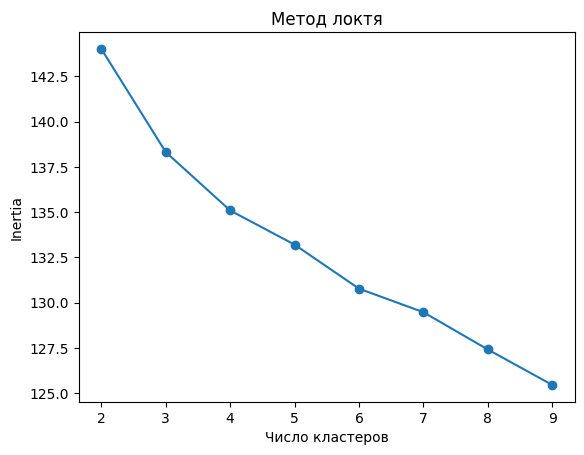

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

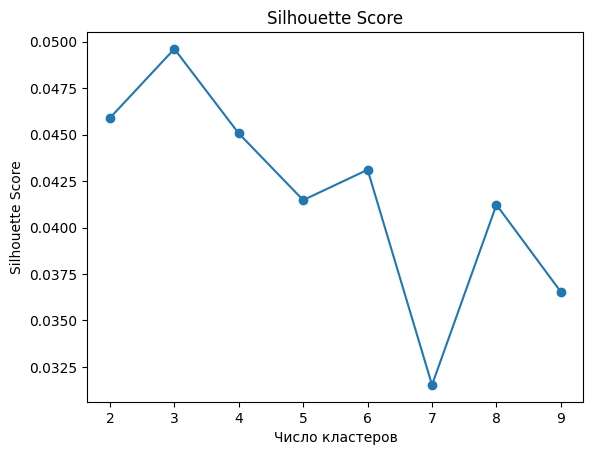

Кластеризация завершена.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Определяем оптимальное число кластеров методом локтя
def elbow_method(embeddings, max_clusters=10):
    distortions = []
    for k in range(2, max_clusters):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(2, max_clusters), distortions, marker='o')
    plt.title('Метод локтя')
    plt.xlabel('Число кластеров')
    plt.ylabel('Inertia')
    plt.show()

# Определям оптимальное число кластеров с помощью silhouette score
def silhouette_method(embeddings, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(embeddings)
        score = silhouette_score(embeddings, labels)
        silhouette_scores.append(score)
    
    plt.plot(range(2, max_clusters), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Число кластеров')
    plt.ylabel('Silhouette Score')
    plt.show()

# Выбор метода локтя или силуэта для определения числа кластеров
elbow_method(embeddings)
silhouette_method(embeddings)

# Кластеризация документов
optimal_clusters = 5  # Здесь установим оптимальное число кластеров
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

print("Кластеризация завершена.")


In [17]:
# Кластеризация документов
optimal_clusters = 3  # Устанавливаем оптимальное число кластеров по графикам

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 4. Классификация новых документов
Для классификации нового документа найдем его ближайший кластер с использованием метода ближайших соседей или косинусного расстояния.

In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Инициализируем получнный классификатор на основе ближайших соседей
neighbors = NearestNeighbors(n_neighbors=optimal_clusters, metric='cosine').fit(embeddings)

# Функция для классификации нового документа
def classify_new_document(new_document):
    # Предобработка нового текста
    preprocessed_text = preprocess_text(new_document)
    
    # Получаем эмбеддинга нового документа
    new_embedding = model.encode([preprocessed_text])[0]
    
    # Ищим ближайший кластер
    distances, indices = neighbors.kneighbors([new_embedding])
    
    # Определям кластер нового документа
    nearest_cluster_label = labels[indices[0][0]]
    return nearest_cluster_label

# Пример: Классификация нового документа
new_document = "/kaggle/input/text-samples/sampled_texts/03d075029311750d531673518196d0702eb863de23f7533a1232df023851b5af.txt"
cluster_label = classify_new_document(new_document)

print(f"Новый документ отнесен к кластеру: {cluster_label}")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Новый документ отнесен к кластеру: 2
